In [73]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt

In [58]:
%matplotlib inline

Our formula for intra-class variance maximization 

**${\displaystyle \sigma _{b}^{2}(t)=\sigma ^{2}-\sigma _{w}^{2}(t)=\omega _{1}(t)\omega _{2}(t)\left[\mu _{1}(t)-\mu _{2}(t)\right]^{2}}$**

**t** - threshold , **sigma**- variance of the given class, **mu** - mean of the givven class, **w** - probability of the given class given specific threhold   

In [68]:
def otsu(gray):
    """ Otsu's image binarization"""
    values = [] 
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])
        
        value = Wb * Wf * (mub - muf) ** 2
        values.append(value)
    
    final_thresh=np.argmax(np.array(values))
    print("Final threshold {}".format(final_thresh)) 
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

In [69]:
default = cv.imread('lena.jpg',0)

In [70]:
result = otsu(default)

Final threshold 161


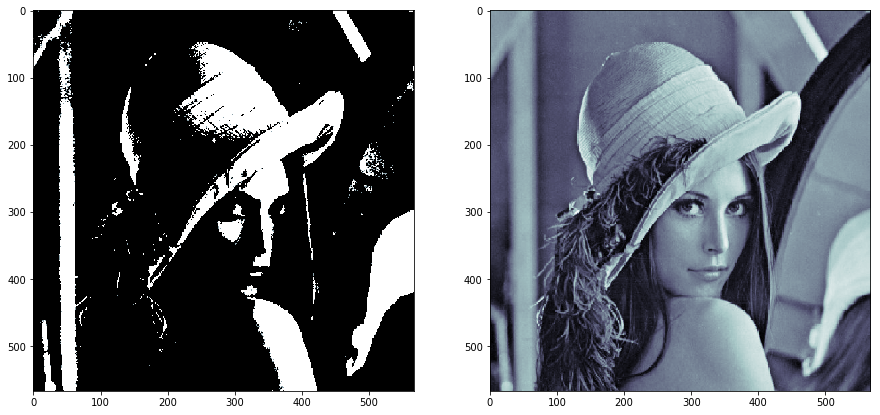

In [77]:
fig,ax = plt.subplots(figsize=(15,15))
plt.subplot(121)
plt.imshow(result,cmap="bone")
plt.subplot(122)
plt.imshow(default,cmap="bone")
